In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('weatherHistory.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

data['Year'] = data['Formatted Date'].dt.year 
data['Day Of Year'] = data['Formatted Date'].dt.dayofyear
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Day Of Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016,253
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016,253
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016,253
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016,253


In [4]:
temp_of_day = data.groupby(['Year', 'Day Of Year'])['Temperature (C)'].mean().reset_index()
temp_of_day

,Year,Day Of Year,Temperature (C)
0,2005,365,0.577778
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852
...,...,...,...
4014,2016,362,0.278009
4015,2016,363,0.222222
4016,2016,364,0.167824
4017,2016,365,0.117593


In [5]:
X = temp_of_day['Day Of Year'].values
Y = temp_of_day['Temperature (C)'].values
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

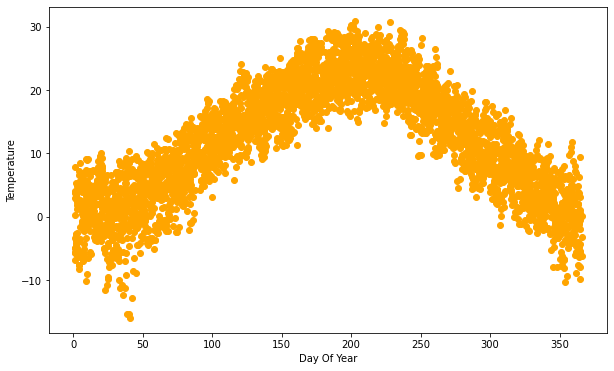

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c='orange')
plt.xlabel('Day Of Year')
plt.ylabel('Temperature')
plt.show()

In [28]:
class Perceptron:
    def __init__(self, lr_w=0.0001, lr_b=0.1, epochs=10):
        # init params
        self.w = np.random.rand(1, 1)
        self.b = np.random.rand(1, 1)

        # hyper parameters
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epochs = epochs
        self.Errors = []
        self.Errors_test = []
        
    def fit(self, X_train, Y_train):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        list_w = []
        list_b = []

        # train
        for epoch in range(self.epochs):
            for i in range(X_train.shape[0]):
                x = X_train[i]
                y = Y_train[i]

                y_pred = x * self.w + self.b
                e = y - y_pred

                # update
                self.w += self.lr_w * e * x
                self.b += self.lr_b * e * 1
                list_w.append(self.w)
                list_b.append(self.b)
                
            Y_pred = X_train * self.w + self.b
            ax1.clear()
            ax1.scatter(X_train, Y_train, c='green')
            ax1.plot(X_train, Y_pred, c='red')

            self.Errors.append(np.mean(Y_train-Y_pred) ** 2) #MSE
            ax2.clear()
            ax2.plot(self.Errors)
            ax2.set_title('MSE Train')

            Y_pred = X_test * self.w + self.b
            self.Errors_test.append(np.mean(Y_test-Y_pred) ** 2) #MSE
            ax3.clear()
            ax3.plot(self.Errors_test)
            ax3.set_title('MSE Test')

        plt.show()
        return list_w, list_b
    
    def predict(self, X_test):
        y_pred = np.matmul(X_test, self.w) + self.b
        return y_pred
    def evaluate(self, X_test, Y_test):
        Y_pred = np.matmul(X_test, self.w) + self.b
        Error = np.abs(Y_test - Y_pred)
        MSE = np.mean(Error**2)
        return MSE

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

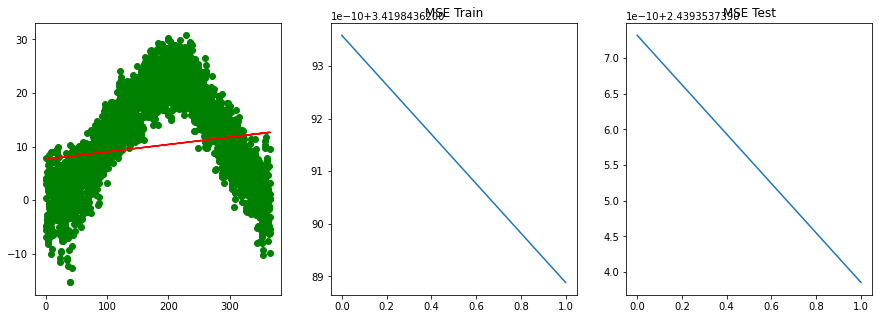

In [30]:
perceptron = Perceptron(lr_w=0.000001, epochs=2)
list_W, list_B = perceptron.fit(X_train, Y_train)

In [32]:
y_pred = perceptron.predict(X_test)
y_pred

array([[ 9.79109821],
       [ 8.73644174],
       [ 8.91450063],
       ...,
       [12.50307198],
       [11.55799021],
       [11.65386807]])

In [33]:
MSE = perceptron.evaluate(X_test, Y_test)
MSE

76.58464757905888

In [34]:
np.save('w_list.npy', list_W)
np.save('b_list.npy', list_B)

In [35]:
np.load('w_list.npy')

array([[[0.01369684]],

       [[0.01369684]],

       [[0.01369684]],

       ...,

       [[0.01369684]],

       [[0.01369684]],

       [[0.01369684]]])

In [36]:
np.load('b_list.npy')

array([[[7.64069477]],

       [[7.64069477]],

       [[7.64069477]],

       ...,

       [[7.64069477]],

       [[7.64069477]],

       [[7.64069477]]])